# Assumptions

## **1. Local Neighborhood Preservation**

* **Assumption:** Points that are close in high-dimensional space should also be close in low-dimensional space.
* **Implication:** t-SNE is designed to preserve **local structure**, not global distances.
* If your data doesn’t have meaningful local clusters, t-SNE may produce misleading embeddings.

---

## **2. Smooth Manifold Structure**

* **Assumption:** High-dimensional data lies on or near a **smooth, low-dimensional manifold**.
* t-SNE tries to “unfold” this manifold in 2D or 3D.
* If the data is completely random or lacks structure, t-SNE embeddings will appear noisy.

---

## **3. Pairwise Similarity Meaningful**

* **Assumption:** The **Euclidean distance (or chosen metric)** in the high-dimensional space reflects meaningful similarity.
* t-SNE converts distances into probabilities, so if your distance metric is poor, t-SNE will produce misleading results.

---

## **4. Noisy Distances Handled by Heavy-Tailed Distribution**

* t-SNE assumes that **small distances are meaningful**, but larger distances may not be reliable.
* That’s why it uses a **Student-t distribution** in low-dimensional space:

  * Heavy tails allow distant points to be “pushed away” without distorting local neighborhoods.

---

## **5. Perplexity Encodes Effective Neighborhood Size**

* **Assumption:** There exists a meaningful “local neighborhood size” in the data.
* The `perplexity` parameter sets this expected neighborhood size.
* If the chosen perplexity is too small or too large relative to actual structure, embeddings may fail to reflect true clusters.

---

## **6. Non-Determinism Assumption**

* t-SNE assumes **stochastic optimization is acceptable**:

  * Different runs may produce different embeddings.
  * Multiple runs can reveal the robustness of clusters.

---

### **Summary Table**

| Assumption                    | Explanation                                          |
| ----------------------------- | ---------------------------------------------------- |
| Local structure matters       | Nearby points should stay close in embedding         |
| Data lies on a low-D manifold | t-SNE tries to unfold it in 2D/3D                    |
| Distances are meaningful      | High-D metric reflects similarity                    |
| Noise tolerance               | Heavy-tailed t-distribution separates distant points |
| Neighborhood size exists      | Controlled via `perplexity`                          |
| Stochastic optimization       | Non-deterministic embedding is acceptable            |

---

### **Key Intuition**

t-SNE is **all about preserving local neighborhoods**.

* If your data has meaningful clusters locally → t-SNE will show clear clusters.
* If the data is noisy or distances are meaningless → t-SNE can produce confusing embeddings.


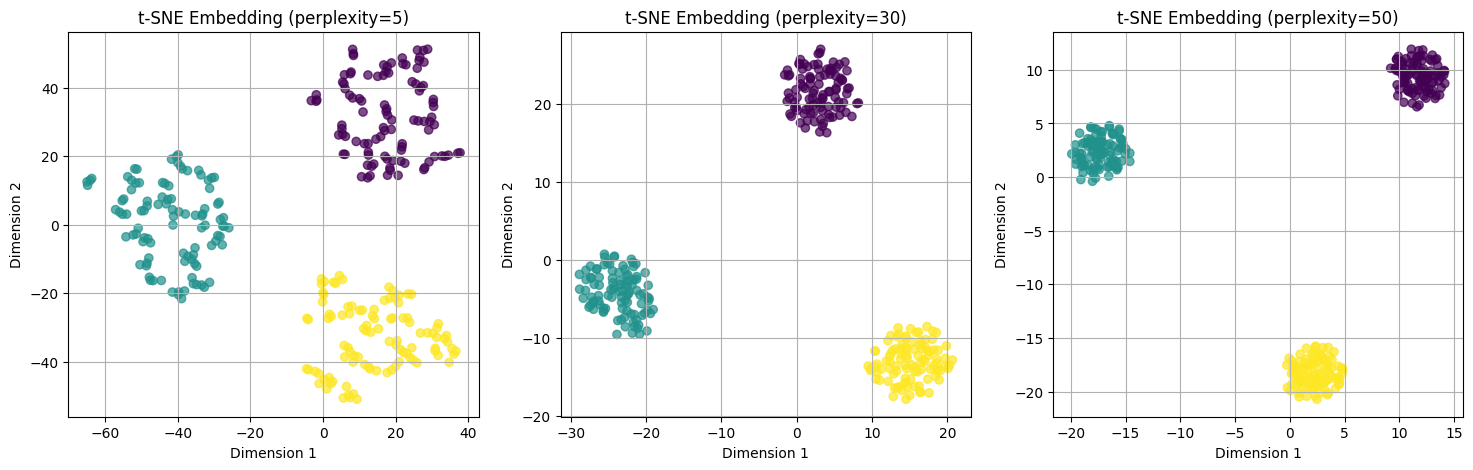

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Generate synthetic 3-cluster dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=3, n_features=5, cluster_std=1.0)

# Apply t-SNE with different perplexities
perplexities = [5, 30, 50]
tsne_embeddings = []

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_embedded = tsne.fit_transform(X)
    tsne_embeddings.append(X_embedded)

# Plot t-SNE embeddings
plt.figure(figsize=(18, 5))

for i, p in enumerate(perplexities):
    plt.subplot(1, 3, i+1)
    plt.scatter(tsne_embeddings[i][:, 0], tsne_embeddings[i][:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(f"t-SNE Embedding (perplexity={p})")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)

plt.show()